## Make plots of data exported from Ocean Virtual Laboratory

https://ovl.oceandatalab.com/?date=1680436800000&timespan=3d&extent=-14303685.47934_4194943.7533709_-13259861.421222_4682306.2456493&center=-13781773.450281_4438624.9995101&zoom=8&products=3857_GlobCurrent_CMEMS_geostrophic_streamline%21900913_User_Shapes%213857_Sentinel-3_OLCI_Chlorophyll_a_oc4me%213857_SST_VIIRS_denoised%213857_GIBS_GHRSST_L4_MUR_Sea_Surface_Temperature%213857_SST_MODIS_denoised%213857_SEVIRI_OSISAF_L3C_SST_raster&opacity=60_100_100_100_100_100_70&stackLevel=120.07_10000_87.01_90.01_50.3_90.02_55.01&selection=1111111



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patheffects import Stroke
import copy
import cartopy.crs as ccrs                   # import projections
import cartopy
import datetime
import functions as fn


In [2]:
file = '../data/external/3857_Sentinel-3B_OLCI_Chlorophyll_a_oc4me-S3B_OL_2_WFR____20230401T185033_20230401T185333_20230401T205116_0179_078_013_2340_MAR_O_NR_003.npy'
# Lat/lon corners for this extraction:
# POLYGON((-125.6471 35.8999,-122.0634 35.8999,-122.0634 38.3933,-125.6471 38.3933,-125.6471 35.8999))
minlon = -125.6471
maxlon = -122.0634
minlat = 35.8999
maxlat = 38.3933

In [3]:
foo = np.load(file)

In [4]:
ny, nx = np.shape(foo)
lat = np.linspace(maxlat, minlat, ny)
lon = np.linspace(minlon, maxlon, nx)

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

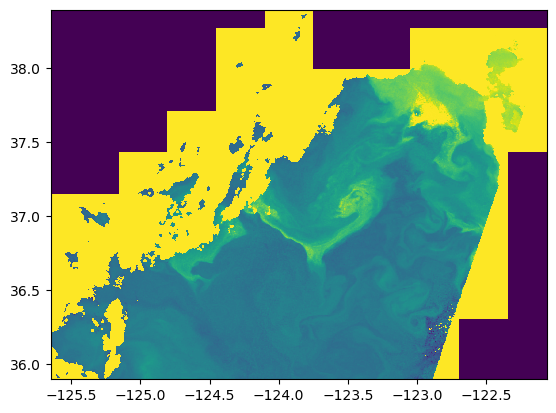

In [6]:
xmin, xmax = (-127,-121)
ymin, ymax = (35, 39.25)


V=(-1,1)
#Set color scale range (define V with input file)
levels = np.linspace(V[0],V[1],21)


plt.figure()
plt.pcolormesh(lon,lat,foo)#,vmin=levels[0], vmax=levels[-1])
ax = plt.gca()  


((-126.25, -123.99, -123.354, -122.92, -124.36, -124.16, -125.515, -126.25),
 (38.342, 37.707, 37.75, 37.0, 36.337, 36.0, 35.6, 38.342))

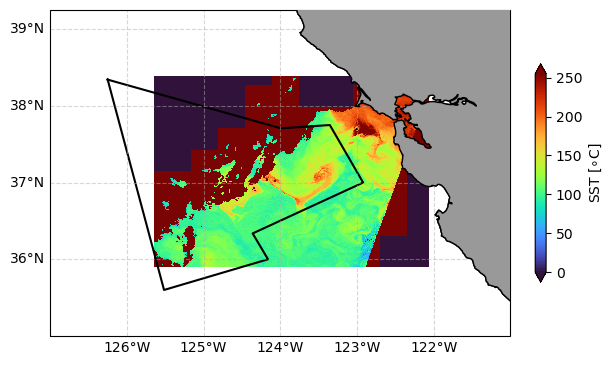

In [10]:
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
extent = [xmin, xmax, ymin, ymax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
cmap = copy.copy(matplotlib.cm.get_cmap("turbo"))
cmap.set_bad(color='white')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
#cs = ax.pcolormesh(sst.lon,sst.lat,np.squeeze(arr)-273.15, vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
cs = ax.pcolormesh(lon, lat, foo,  transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SST [$\circ$C]',fontsize = 10)
fn.plot_ops_area_IOP2(ax,transform=ccrs.PlateCarree(),color='k')